In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [155]:
# 그래프 한글, 마이너스 깨짐 방지

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 원유 가격 데이터 전처리

In [47]:
# 2012~2021년 각 월별 원유 데이터
oil_day = pd.read_csv('./data/국제_원유가격20120101_20211231.csv', encoding='utf-8')
oil_day

,기간,Dubai,Brent,WTI
0,12년01월03일,105.91,112.13,102.96
1,12년01월04일,108.49,113.70,103.22
2,12년01월05일,110.23,112.74,101.81
3,12년01월06일,109.92,113.06,101.56
4,12년01월09일,110.50,112.45,101.31
...,...,...,...,...
2576,21년12월27일,NaN,78.60,75.57
2577,21년12월28일,76.47,78.94,75.98
2578,21년12월29일,76.91,79.23,76.56
2579,21년12월30일,77.24,79.32,76.99


In [48]:
oil_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      2581 non-null   object 
 1   Dubai   2503 non-null   float64
 2   Brent   2573 non-null   float64
 3   WTI     2514 non-null   float64
dtypes: float64(3), object(1)
memory usage: 80.8+ KB


In [49]:
oil_day.rename(columns={'기간':'date'}, inplace=True)
oil_day

,date,Dubai,Brent,WTI
0,12년01월03일,105.91,112.13,102.96
1,12년01월04일,108.49,113.70,103.22
2,12년01월05일,110.23,112.74,101.81
3,12년01월06일,109.92,113.06,101.56
4,12년01월09일,110.50,112.45,101.31
...,...,...,...,...
2576,21년12월27일,NaN,78.60,75.57
2577,21년12월28일,76.47,78.94,75.98
2578,21년12월29일,76.91,79.23,76.56
2579,21년12월30일,77.24,79.32,76.99


In [50]:
# 원유가격 데이터 결측치 확인
oil_day.isnull().sum()

date      0
Dubai    78
Brent     8
WTI      67
dtype: int64

In [51]:
# 결측치 발생한 지점을 위아래 값의 평균으로 대체
# interpolate함수 : 결측치를 앞뒤값의 평균으로 처리해주는 함수. 시계열데이터 결측치처리에 효과적.
oil_day.interpolate(inplace=True)
oil_day.isnull().sum()

date     0
Dubai    0
Brent    0
WTI      0
dtype: int64

In [52]:
oil_day['date'] = oil_day['date'].str.replace('년','-')
oil_day['date'] = oil_day['date'].str.replace('월','-')
oil_day['date'] = oil_day['date'].str.replace('일','')
oil_day

,date,Dubai,Brent,WTI
0,12-01-03,105.91,112.13,102.96
1,12-01-04,108.49,113.70,103.22
2,12-01-05,110.23,112.74,101.81
3,12-01-06,109.92,113.06,101.56
4,12-01-09,110.50,112.45,101.31
...,...,...,...,...
2576,21-12-27,75.42,78.60,75.57
2577,21-12-28,76.47,78.94,75.98
2578,21-12-29,76.91,79.23,76.56
2579,21-12-30,77.24,79.32,76.99


In [53]:
oil_day['date'] = '20' + oil_day['date'].astype(str)
oil_day

,date,Dubai,Brent,WTI
0,2012-01-03,105.91,112.13,102.96
1,2012-01-04,108.49,113.70,103.22
2,2012-01-05,110.23,112.74,101.81
3,2012-01-06,109.92,113.06,101.56
4,2012-01-09,110.50,112.45,101.31
...,...,...,...,...
2576,2021-12-27,75.42,78.60,75.57
2577,2021-12-28,76.47,78.94,75.98
2578,2021-12-29,76.91,79.23,76.56
2579,2021-12-30,77.24,79.32,76.99


In [54]:
# type을 str에서 datetime으로 바꿈
oil_day['date'] = pd.to_datetime(oil_day['date'])

In [55]:
oil_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2581 non-null   datetime64[ns]
 1   Dubai   2581 non-null   float64       
 2   Brent   2581 non-null   float64       
 3   WTI     2581 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 80.8 KB


In [56]:
oil_day['oil_avg']=( oil_day['Dubai']+oil_day['Brent']+oil_day['WTI'] ) /3
oil_day

,date,Dubai,Brent,WTI,oil_avg
0,2012-01-03,105.91,112.13,102.96,107.000000
1,2012-01-04,108.49,113.70,103.22,108.470000
2,2012-01-05,110.23,112.74,101.81,108.260000
3,2012-01-06,109.92,113.06,101.56,108.180000
4,2012-01-09,110.50,112.45,101.31,108.086667
...,...,...,...,...,...
2576,2021-12-27,75.42,78.60,75.57,76.530000
2577,2021-12-28,76.47,78.94,75.98,77.130000
2578,2021-12-29,76.91,79.23,76.56,77.566667
2579,2021-12-30,77.24,79.32,76.99,77.850000


In [12]:
# 일별 원유 가격 데이터 파일 저장
oil_day.to_csv('./pre_data/일별_원유가격.csv',encoding='utf-8')

In [57]:
# 월별 원유 가격 데이터 만들기
oil_month = oil_day.resample('M',on='date').mean()
oil_month

,Dubai,Brent,WTI,oil_avg
date,,,,
2012-01-31,109.456667,111.452381,100.289286,107.066111
2012-02-29,116.180952,119.060000,102.370952,112.537302
2012-03-31,122.487273,124.544545,106.205000,117.745606
2012-04-30,117.338500,120.486500,103.346000,113.723667
2012-05-31,107.719348,110.288696,94.546087,104.184710
...,...,...,...,...
2021-08-31,69.518864,70.513636,67.711364,69.247955
2021-09-30,72.628182,74.876364,71.420909,72.975152
2021-10-31,81.610952,83.746190,81.222857,82.193333


In [58]:
oil_month = oil_month.reset_index()
oil_month

,date,Dubai,Brent,WTI,oil_avg
0,2012-01-31,109.456667,111.452381,100.289286,107.066111
1,2012-02-29,116.180952,119.060000,102.370952,112.537302
2,2012-03-31,122.487273,124.544545,106.205000,117.745606
3,2012-04-30,117.338500,120.486500,103.346000,113.723667
4,2012-05-31,107.719348,110.288696,94.546087,104.184710
...,...,...,...,...,...
115,2021-08-31,69.518864,70.513636,67.711364,69.247955
116,2021-09-30,72.628182,74.876364,71.420909,72.975152
117,2021-10-31,81.610952,83.746190,81.222857,82.193333
118,2021-11-30,80.317500,80.849545,78.409091,79.858712


In [59]:
oil_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     120 non-null    datetime64[ns]
 1   Dubai    120 non-null    float64       
 2   Brent    120 non-null    float64       
 3   WTI      120 non-null    float64       
 4   oil_avg  120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.8 KB


In [16]:
# 월별 원유 가격 데이터 파일 저장
oil_month.to_csv('./pre_data/월별_원유가격.csv',encoding='utf-8')

## 종계입식 현황 데이터 전처리 (단위: 천)

In [18]:
breeding =pd.read_csv('./data/2012_2021종계입식현황.csv', encoding='utf-8')
breeding

,date,count
0,2012-01-31,356
1,2012-02-29,672
2,2012-03-31,870
3,2012-04-30,718
4,2012-05-31,496
...,...,...
115,2021-08-31,670
116,2021-09-30,479
117,2021-10-31,591
118,2021-11-30,652


In [19]:
breeding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    120 non-null    object
 1   count   120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [20]:
# type을 str에서 datetime으로 바꿈
breeding['date'] = pd.to_datetime(breeding['date'])

In [21]:
breeding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    120 non-null    datetime64[ns]
 1   count   120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [22]:
# 월별 종계입식 데이터 파일 저장
breeding.to_csv('./pre_data/월별_종계입식현황.csv',encoding='utf-8')

## 닭고기가격, 수입량 그래프 시각화

In [188]:
price_df = pd.read_csv('./pre_data/월별_닭고기가격.csv', header=0, encoding='utf8')
price_df

,Unnamed: 0,date,price
0,0,2012-01-31,3202
1,1,2012-02-29,3668
2,2,2012-03-31,4169
3,3,2012-04-30,3399
4,4,2012-05-31,3255
...,...,...,...
115,115,2021-08-31,3505
116,116,2021-09-30,3074
117,117,2021-10-31,3913
118,118,2021-11-30,2985


In [187]:
income_df = pd.read_csv('./pre_data/월별_닭고기_수입량.csv', encoding='utf8')
income_df

,Unnamed: 0,date,import amount
0,0,2012-01-31,8754
1,1,2012-02-29,10098
2,2,2012-03-31,10836
3,3,2012-04-30,13412
4,4,2012-05-31,14519
...,...,...,...
115,115,2021-08-31,9360
116,116,2021-09-30,9009
117,117,2021-10-31,12005
118,118,2021-11-30,10025


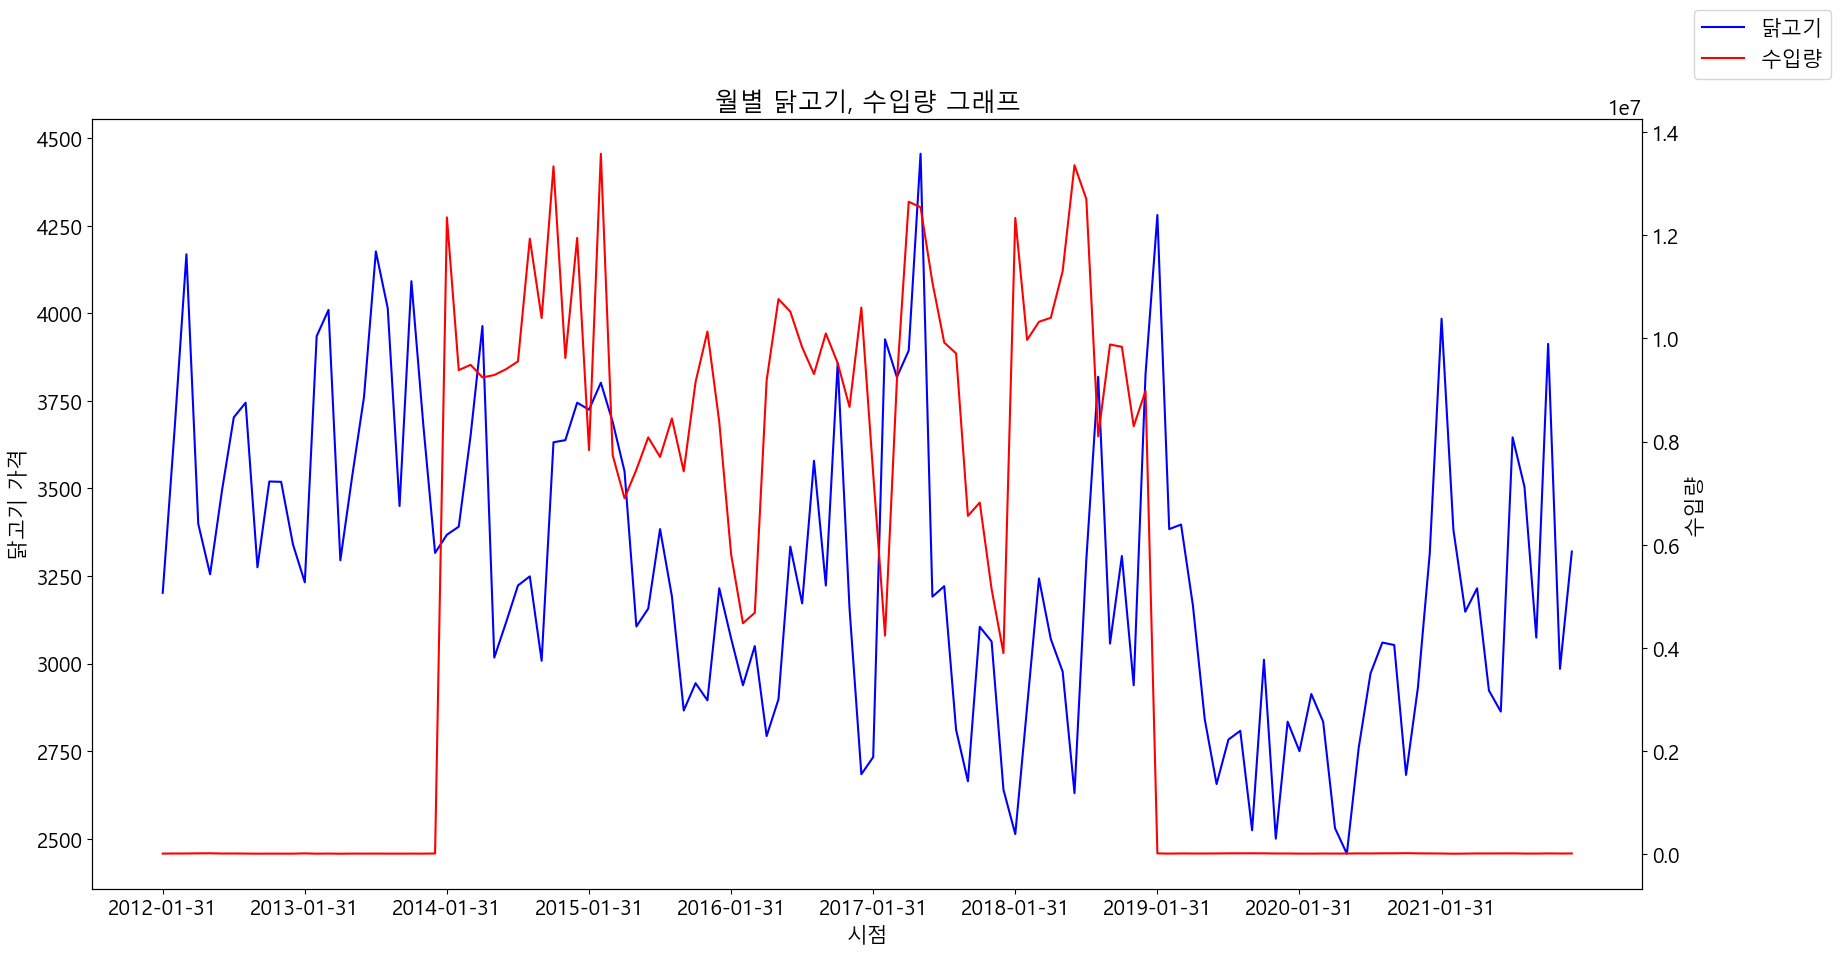

In [182]:
# 닭고기 가격, 수입량 기본 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_df['date']
y1 = price_df['price']
y2 = income_df['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기, 수입량 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='blue',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='red',label='수입량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
# plt.legend()
plt.show()

### 수입량 = 닭고기 * 수입량
- 강사님께서 수입량의 편차가 너무 커서 닭고기 가격과 수입량을 곱하여 수입량 데이터처럼 사용해보라고 하셨음.
- 결론 : 값들을 곱해도 달라지는게 거의 없으므로 굳이 사용 X

In [189]:
new_income = pd.merge(price_df, income_df , on='date',how='right')
new_income

,Unnamed: 0_x,date,price,Unnamed: 0_y,import amount
0,0,2012-01-31,3202,0,8754
1,1,2012-02-29,3668,1,10098
2,2,2012-03-31,4169,2,10836
3,3,2012-04-30,3399,3,13412
4,4,2012-05-31,3255,4,14519
...,...,...,...,...,...
115,115,2021-08-31,3505,115,9360
116,116,2021-09-30,3074,116,9009
117,117,2021-10-31,3913,117,12005
118,118,2021-11-30,2985,118,10025


In [190]:
new_income.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)
new_income

,date,price,import amount
0,2012-01-31,3202,8754
1,2012-02-29,3668,10098
2,2012-03-31,4169,10836
3,2012-04-30,3399,13412
4,2012-05-31,3255,14519
...,...,...,...
115,2021-08-31,3505,9360
116,2021-09-30,3074,9009
117,2021-10-31,3913,12005
118,2021-11-30,2985,10025


In [191]:
# 수입량 변수 새로 만든거 컬럼 추가
new_income['total_amount'] = new_income['price']*new_income['import amount']
new_income

,date,price,import amount,total_amount
0,2012-01-31,3202,8754,28030308
1,2012-02-29,3668,10098,37039464
2,2012-03-31,4169,10836,45175284
3,2012-04-30,3399,13412,45587388
4,2012-05-31,3255,14519,47259345
...,...,...,...,...
115,2021-08-31,3505,9360,32806800
116,2021-09-30,3074,9009,27693666
117,2021-10-31,3913,12005,46975565
118,2021-11-30,2985,10025,29924625


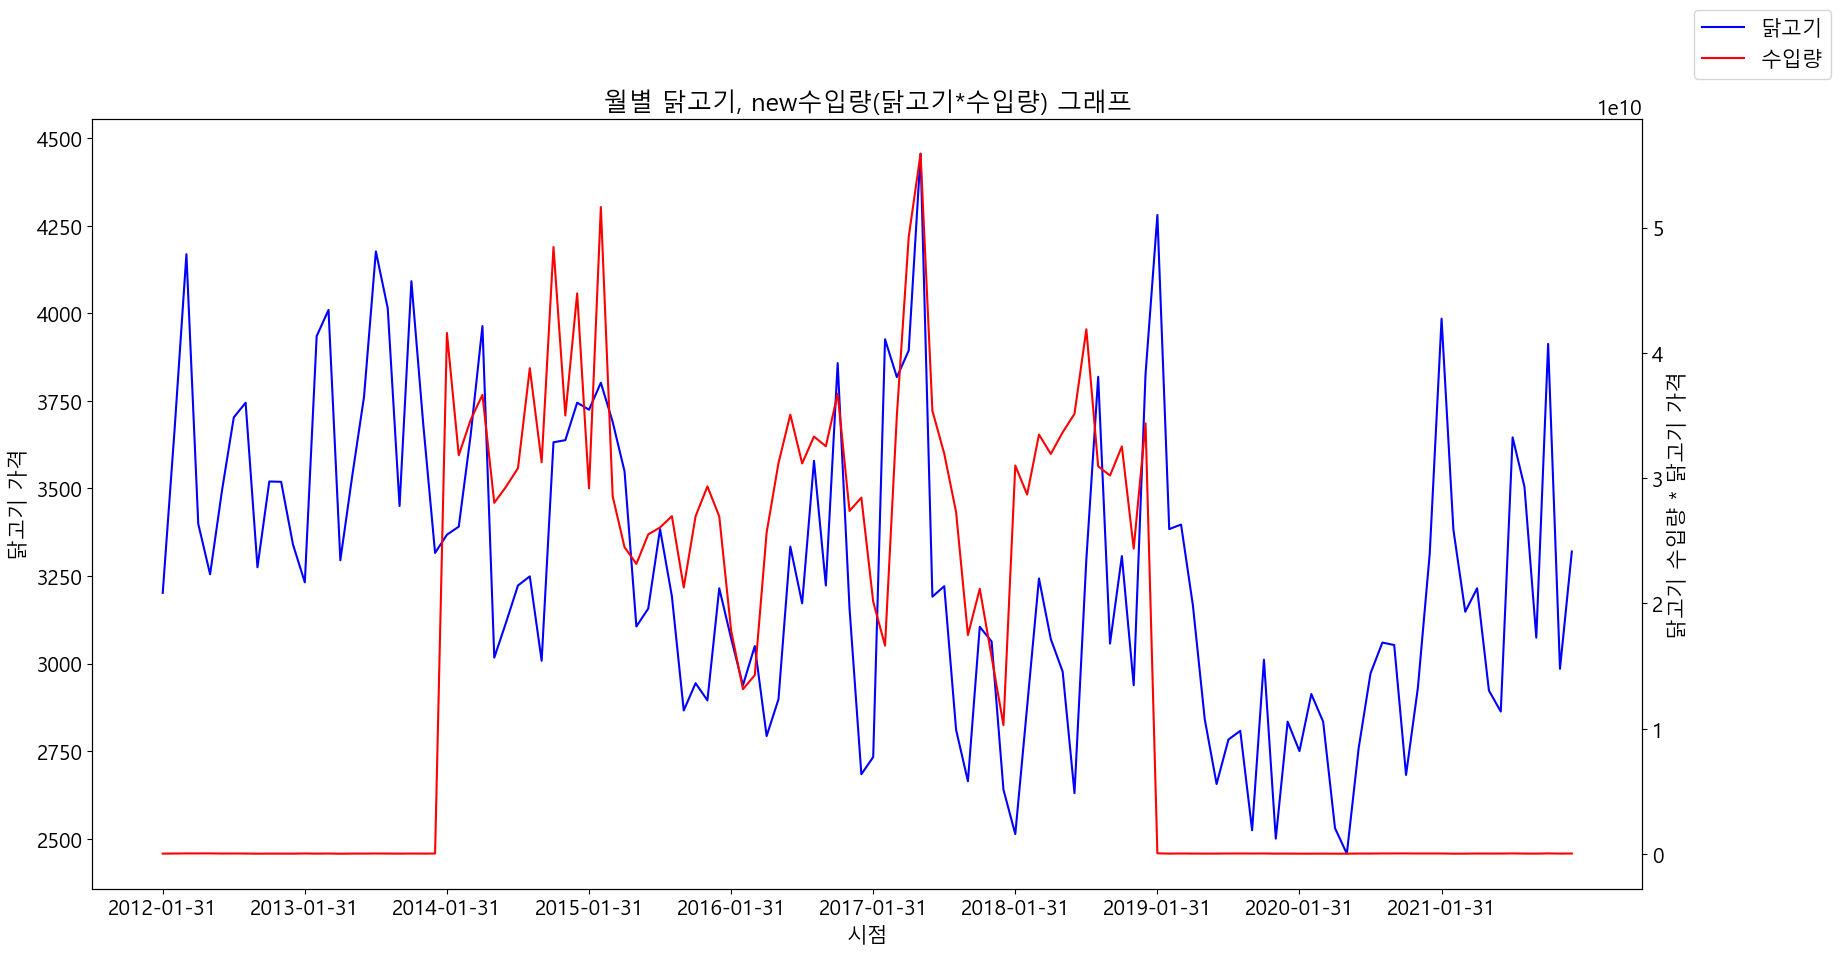

In [183]:
# 월별 닭고기, new수입량(닭고기*수입량) 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = new_income['date']
y1 = new_income['price']
y2 = new_income['total_amount']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기, new수입량(닭고기*수입량) 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='blue',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('닭고기 수입량 * 닭고기 가격')
ax2.plot(x, y2, color='red',label='수입량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
# plt.legend()
plt.show()

- 수입량의 전체적인 그래프를 보면 큰 편차가 나타남
- 닭고기 가격과 수입량의 변화를 세부적으로 확인하기 위해 3개의 그룹으로 분리해서 확인
- 2012-13 / 2014-18 / 2019-21
- 2014 ~ 2018 기간에 무슨 일이 있었는지 확인 ! (급격한 수입량의 차이가 나타남. 백만~천만단위)

### 수입량 데이터 범위 쪼개서 그래프 그리기
- 수입량의 전체적인 그래프를 보면 큰 편차가 나타남
- 닭고기 가격과 수입량의 변화를 세부적으로 확인하기 위해 3개의 그룹으로 분리해서 확인
- 2012-13 / 2014-18 / 2019-21
- 2014 ~ 2018 기간에 무슨 일이 있었는지 확인 ! (급격한 수입량의 차이가 나타남. 백만~천만단위)

In [192]:
# 수입량 범위 분리
income_group1 = income_df.iloc[:23,:]
income_group2 = income_df.iloc[24:83,:]
income_group3 = income_df.iloc[84:,:]

# 수입량에 맞춰 닭고기 가격 기간 분리
price_group1 = price_df.iloc[:23,:]
price_group2 = price_df.iloc[24:83,:]
price_group3 = price_df.iloc[84:,:]

#### 그룹별 시각화 그래프

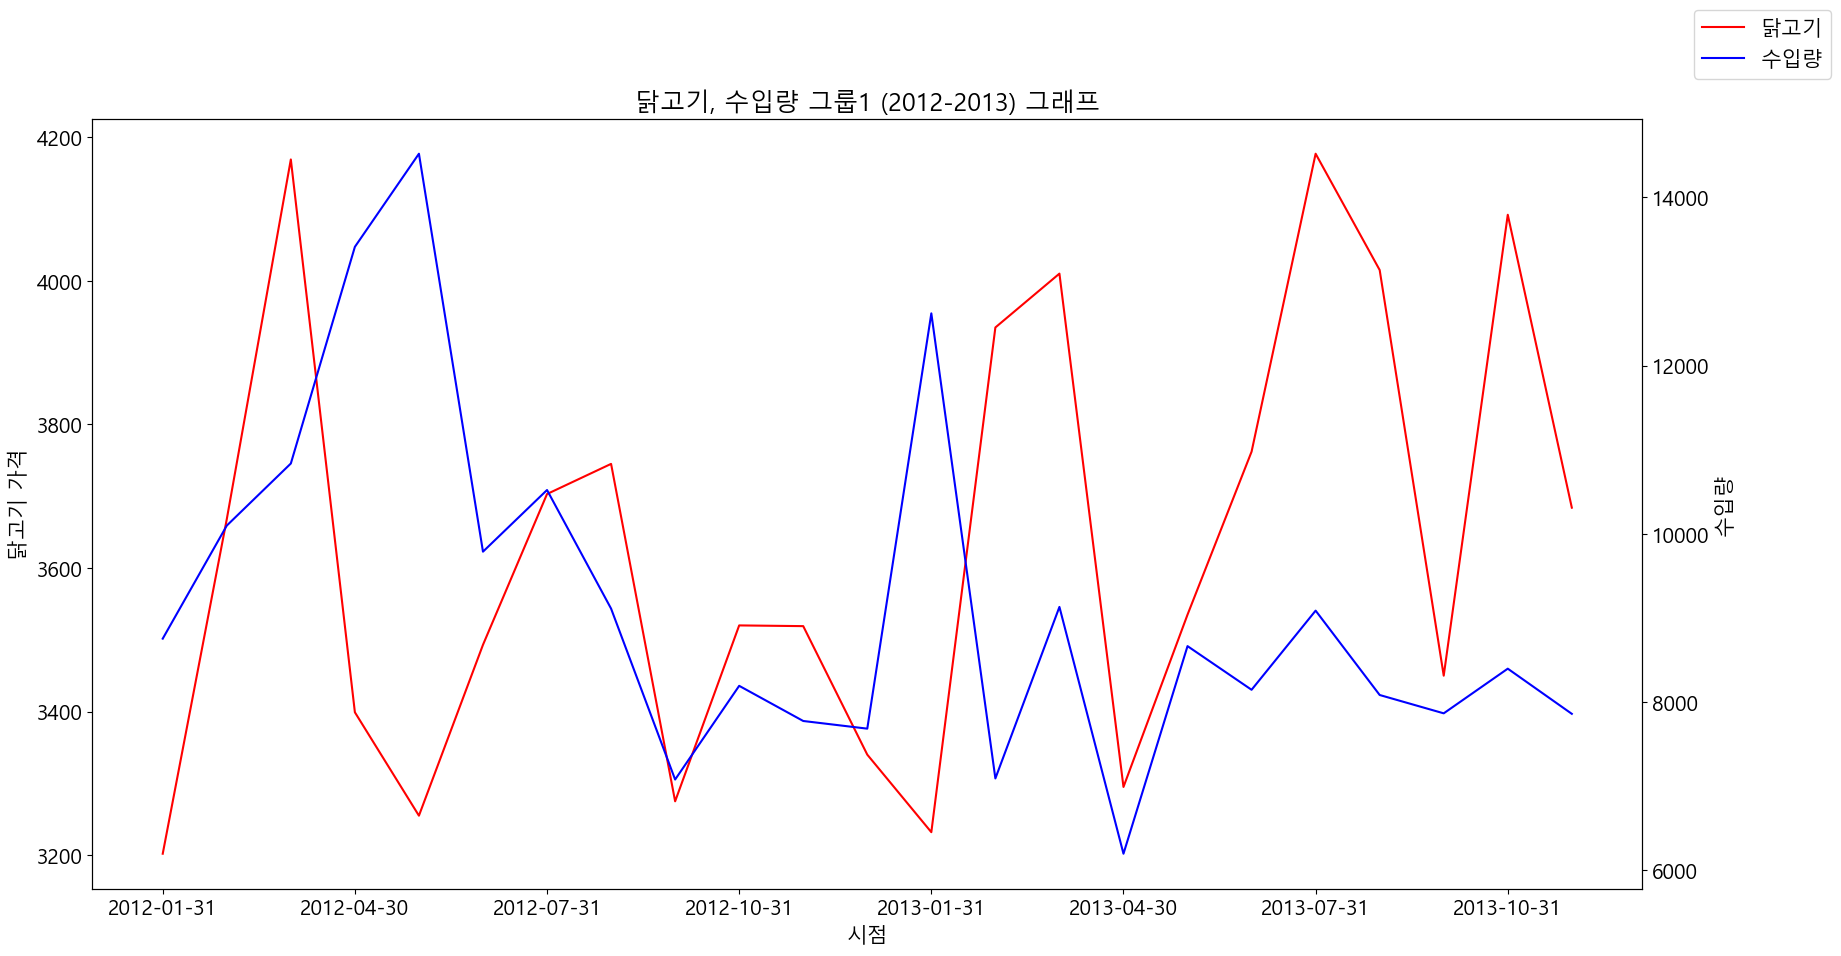

In [184]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_group1['date']
y1 = price_group1['price']
y2 = income_group1['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹1 (2012-2013) 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2012-01-31', '2012-04-30', '2012-07-31', '2012-10-31', '2013-01-31', '2013-04-30', '2013-07-31', '2013-10-31'])
fig.legend()
plt.show()

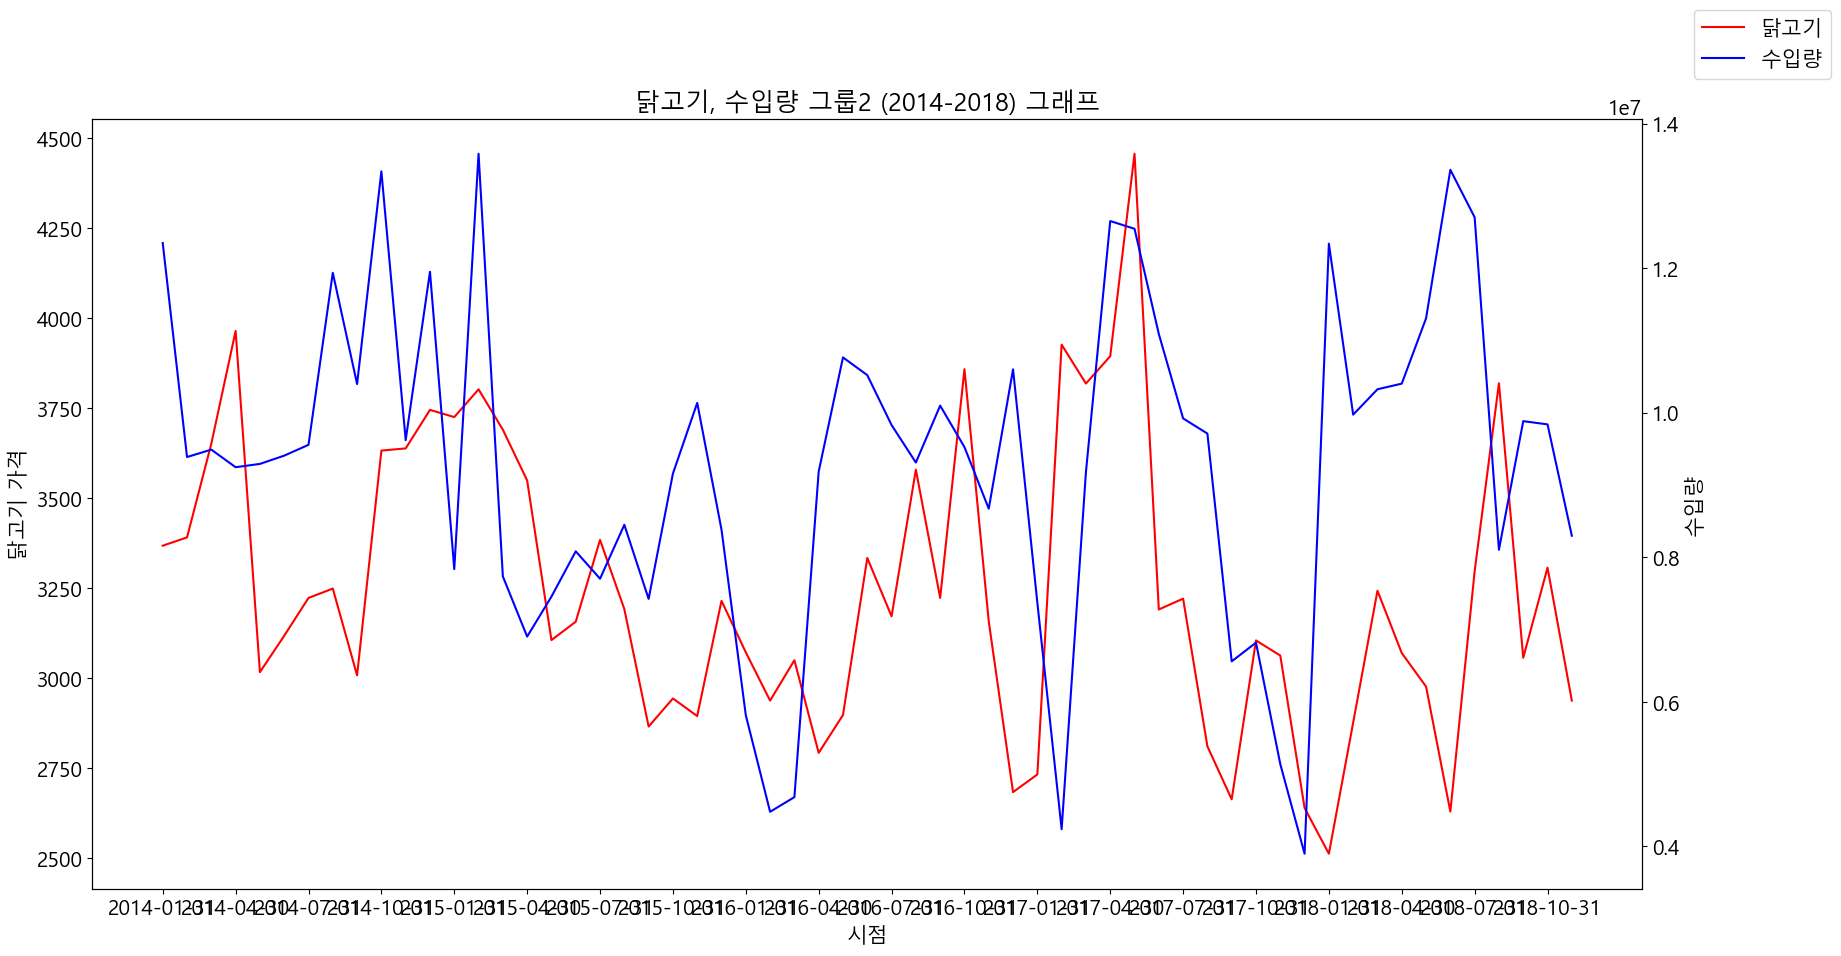

In [185]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_group2['date']
y1 = price_group2['price']
y2 = income_group2['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹2 (2014-2018) 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2014-01-31', '2014-04-30', '2014-07-31', '2014-10-31', '2015-01-31', '2015-04-30', '2015-07-31', '2015-10-31', '2016-01-31', '2016-04-30', '2016-07-31', '2016-10-31',
             '2017-01-31', '2017-04-30', '2017-07-31', '2017-10-31', '2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31'])
fig.legend()
plt.show()

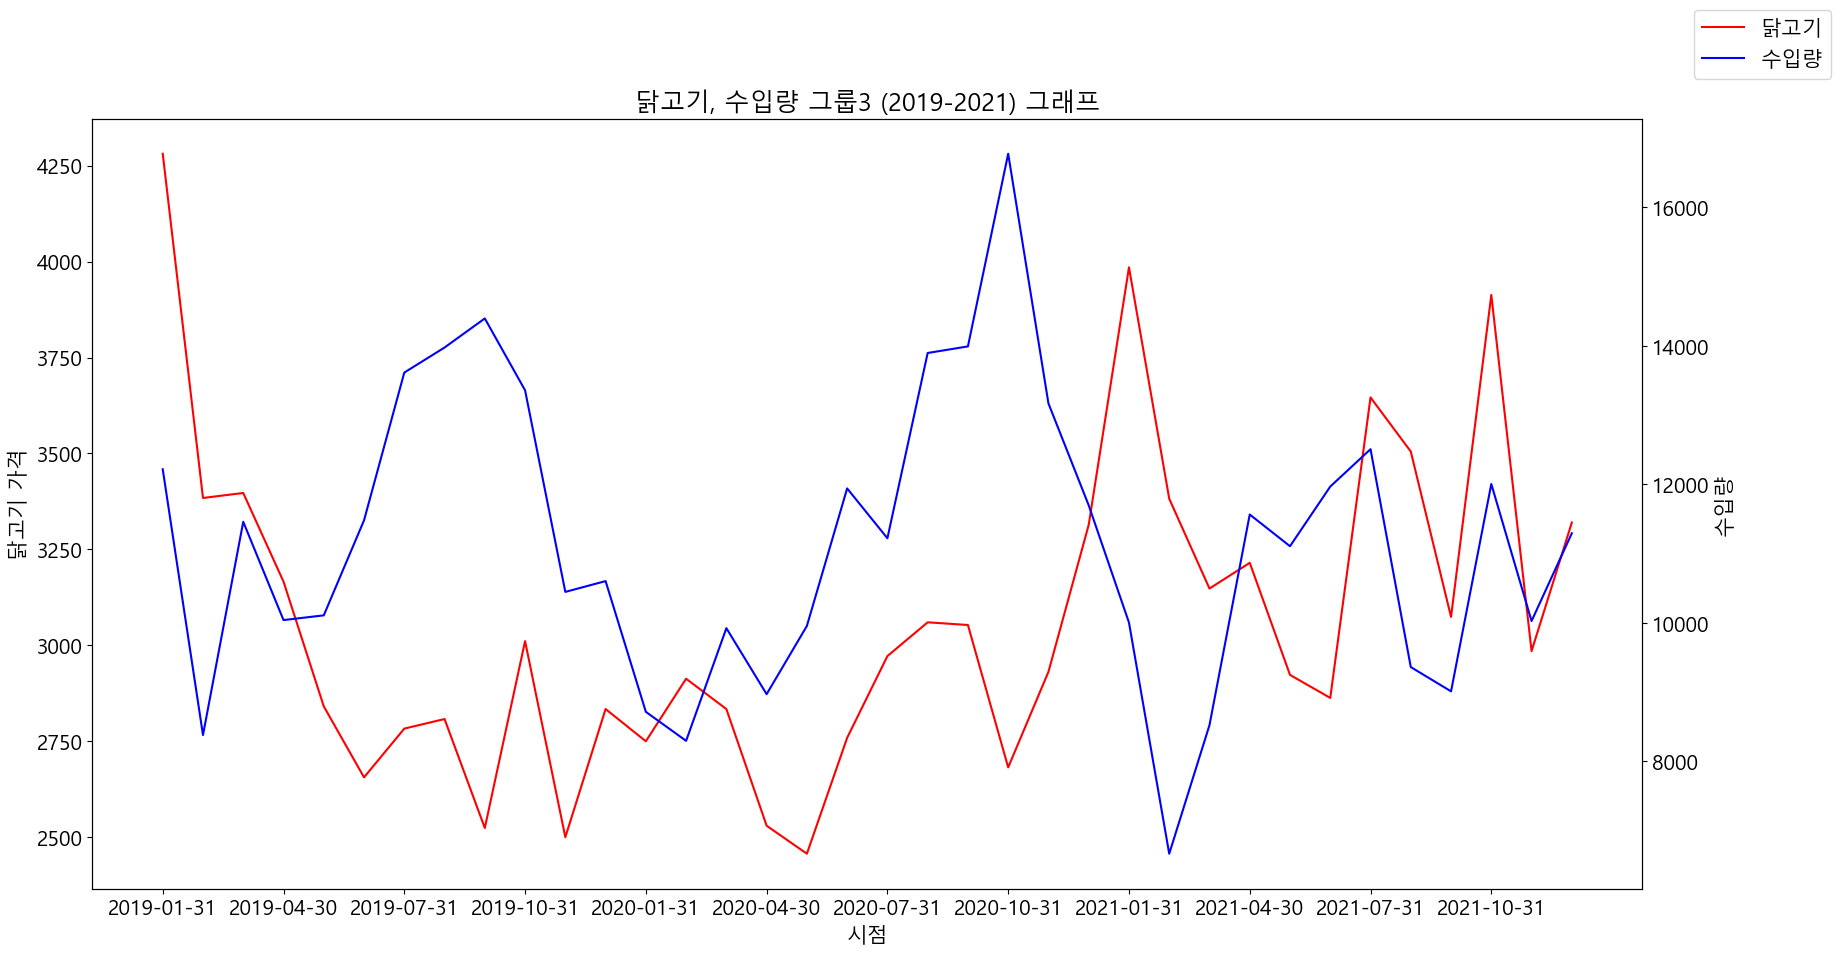

In [186]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_group3['date']
y1 = price_group3['price']
y2 = income_group3['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹3 (2019-2021) 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2019-01-31', '2019-04-30', '2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31'])
fig.legend()
plt.show()

- 수입량이 떨어질수록 닭고기 올라가고, 수입량이 늘어날수록 닭고기 가격 떨어지는게 보인다
- 단위가 다르므로 정규화 시키기

## 정규화
- MinMaxScaler / StandardScaler 두 가지 방법이 있음
- 두 개 다 돌려보고 정확도가 더 높은 함수를 사용함. 보통 잘 모를때는 StandardScaler 사용함. (해보고 별로면 MinMaxScaler 사용)

- 배열화 처리 먼저 해주기 (numpy 사용)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [143]:
# 스케일링 함수
ss = StandardScaler()

#### 닭고기 가격 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가)

In [193]:
# 닭고기 가격 데이터 배열화 처리
price_df2 = price_df[['price']].to_numpy()
price_df2

array([[3202],
       [3668],
       [4169],
       [3399],
       [3255],
       [3493],
       [3703],
       [3745],
       [3275],
       [3520],
       [3519],
       [3340],
       [3232],
       [3935],
       [4010],
       [3295],
       [3535],
       [3762],
       [4177],
       [4015],
       [3450],
       [4092],
       [3684],
       [3316],
       [3368],
       [3391],
       [3651],
       [3964],
       [3017],
       [3118],
       [3223],
       [3249],
       [3008],
       [3632],
       [3638],
       [3745],
       [3725],
       [3802],
       [3690],
       [3549],
       [3106],
       [3157],
       [3384],
       [3192],
       [2866],
       [2944],
       [2895],
       [3215],
       [3072],
       [2938],
       [3050],
       [2793],
       [2898],
       [3334],
       [3172],
       [3579],
       [3223],
       [3858],
       [3158],
       [2684],
       [2733],
       [3926],
       [3818],
       [3894],
       [4456],
       [3191],
       [32

In [194]:
ss.fit(price_df2)
priceScale=ss.transform(price_df2)
priceScale

array([[-0.15938547],
       [ 0.91251299],
       [ 2.06491884],
       [ 0.29375615],
       [-0.03747428],
       [ 0.50997601],
       [ 0.99302038],
       [ 1.08962926],
       [ 0.00852995],
       [ 0.57208172],
       [ 0.56978151],
       [ 0.15804368],
       [-0.09037914],
       [ 1.5266694 ],
       [ 1.69918525],
       [ 0.05453418],
       [ 0.60658489],
       [ 1.12873285],
       [ 2.08332053],
       [ 1.7106863 ],
       [ 0.41106693],
       [ 1.88780257],
       [ 0.94931637],
       [ 0.10283861],
       [ 0.2224496 ],
       [ 0.27535446],
       [ 0.8734094 ],
       [ 1.59337553],
       [-0.58492456],
       [-0.35260322],
       [-0.11108104],
       [-0.05127554],
       [-0.60562646],
       [ 0.82970538],
       [ 0.84350665],
       [ 1.08962926],
       [ 1.04362503],
       [ 1.2207413 ],
       [ 0.96311764],
       [ 0.63878784],
       [-0.38020576],
       [-0.26289498],
       [ 0.25925298],
       [-0.18238759],
       [-0.93225647],
       [-0

In [195]:
# 2차원 -> 1차원 리스트에 담기
price_list=[]
for i in priceScale :
    price_list.append(i[0])

price_list

[-0.1593854739813105,
 0.9125129872375594,
 2.064918843612353,
 0.2937561501820315,
 -0.037474275602340325,
 0.5099760114579408,
 0.9930203823934831,
 1.0896292565805914,
 0.008529950201044646,
 0.5720817162925106,
 0.5697815050023413,
 0.1580436840620458,
 -0.09037913527623305,
 1.5266694017127487,
 1.6991852484754424,
 0.05453417600442962,
 0.6065848856450493,
 1.1287328485134687,
 2.083320533933707,
 1.7106863049262886,
 0.41106692598066313,
 1.8878025742693207,
 0.9493163678802673,
 0.10283861309798384,
 0.22244960018678478,
 0.27535445986067747,
 0.8734093953046821,
 1.593375529127657,
 -0.5849245626626215,
 -0.3526032223555274,
 -0.11108103688775628,
 -0.051275543343355816,
 -0.6056264642741448,
 0.8297053807914664,
 0.8435066485324819,
 1.0896292565805914,
 1.0436250307772066,
 1.2207413001202387,
 0.9631176356212828,
 0.6387878437074188,
 -0.3802057578375584,
 -0.2628949820389267,
 0.2592529808294928,
 -0.182387586883003,
 -0.932256467478178,
 -0.7528399868449767,
 -0.865550340

In [196]:
price_df['price_ss'] = price_list
price_df

,Unnamed: 0,date,price,price_ss
0,0,2012-01-31,3202,-0.159385
1,1,2012-02-29,3668,0.912513
2,2,2012-03-31,4169,2.064919
3,3,2012-04-30,3399,0.293756
4,4,2012-05-31,3255,-0.037474
...,...,...,...,...
115,115,2021-08-31,3505,0.537579
116,116,2021-09-30,3074,-0.453813
117,117,2021-10-31,3913,1.476065
118,118,2021-11-30,2985,-0.658531


#### 수입량 정규화 값 컬럼 추가 (배열화 > 스케일링 > 차원축소 > 컬럼추가)

In [197]:
# 수입량 데이터 배열화 처리
income_df2 = income_df[['import amount']].to_numpy()

In [198]:
ss.fit(income_df2)
incomeScale=ss.transform(income_df2)
incomeScale

array([[-0.94536937],
       [-0.94509535],
       [-0.94494488],
       [-0.94441968],
       [-0.94419397],
       [-0.94515855],
       [-0.94500911],
       [-0.94529658],
       [-0.94571088],
       [-0.94548375],
       [-0.94556897],
       [-0.94558753],
       [-0.94458095],
       [-0.94570823],
       [-0.94529251],
       [-0.9458907 ],
       [-0.94538752],
       [-0.94549333],
       [-0.94530148],
       [-0.94550597],
       [-0.94555042],
       [-0.94544216],
       [-0.94555164],
       [-0.94497363],
       [ 1.57012687],
       [ 0.96639423],
       [ 0.98724368],
       [ 0.93763426],
       [ 0.94694751],
       [ 0.97027824],
       [ 1.00080242],
       [ 1.48613169],
       [ 1.17225779],
       [ 1.77230317],
       [ 1.01406879],
       [ 1.48901381],
       [ 0.65023988],
       [ 1.82202962],
       [ 0.62958107],
       [ 0.4597531 ],
       [ 0.57264179],
       [ 0.70035799],
       [ 0.62306838],
       [ 0.77517367],
       [ 0.56613339],
       [ 0

In [199]:
# 2차원 -> 1차원 리스트에 담기
income_list=[]
for i in incomeScale :
    income_list.append(i[0])

income_list

[-0.945369369870911,
 -0.9450953488959611,
 -0.9449448820213234,
 -0.9444196751526694,
 -0.9441939748407129,
 -0.9451585531386951,
 -0.9450091056873273,
 -0.94529658304944,
 -0.9457108766663286,
 -0.9454837491617941,
 -0.945568972947158,
 -0.9455875264506702,
 -0.9445809479139681,
 -0.9457082261658268,
 -0.9452925053563603,
 -0.9458907029311394,
 -0.9453875156051154,
 -0.9454933317405313,
 -0.9453014762811355,
 -0.9455059725890781,
 -0.9455504194436458,
 -0.9454421566923821,
 -0.9455516427515697,
 -0.9449736297575347,
 1.5701268693970973,
 0.9663942340317511,
 0.9872436826324612,
 0.9376342647412477,
 0.9469475118504275,
 0.9702782366900815,
 1.0008024198914791,
 1.4861316929580937,
 1.172257792463887,
 1.772303173861994,
 1.0140687865566889,
 1.4890138064267635,
 0.6502398836827714,
 1.8220296215445926,
 0.6295810672335331,
 0.4597531019691984,
 0.5726417921470629,
 0.7003579937856667,
 0.6230683797314308,
 0.7751736714485019,
 0.5661333862226943,
 0.9196361430264561,
 1.1191158690578

In [200]:
income_df['income_ss'] = income_list
income_df.head()

,Unnamed: 0,date,import amount,income_ss
0,0,2012-01-31,8754,-0.945369
1,1,2012-02-29,10098,-0.945095
2,2,2012-03-31,10836,-0.944945
3,3,2012-04-30,13412,-0.944420
4,4,2012-05-31,14519,-0.944194


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


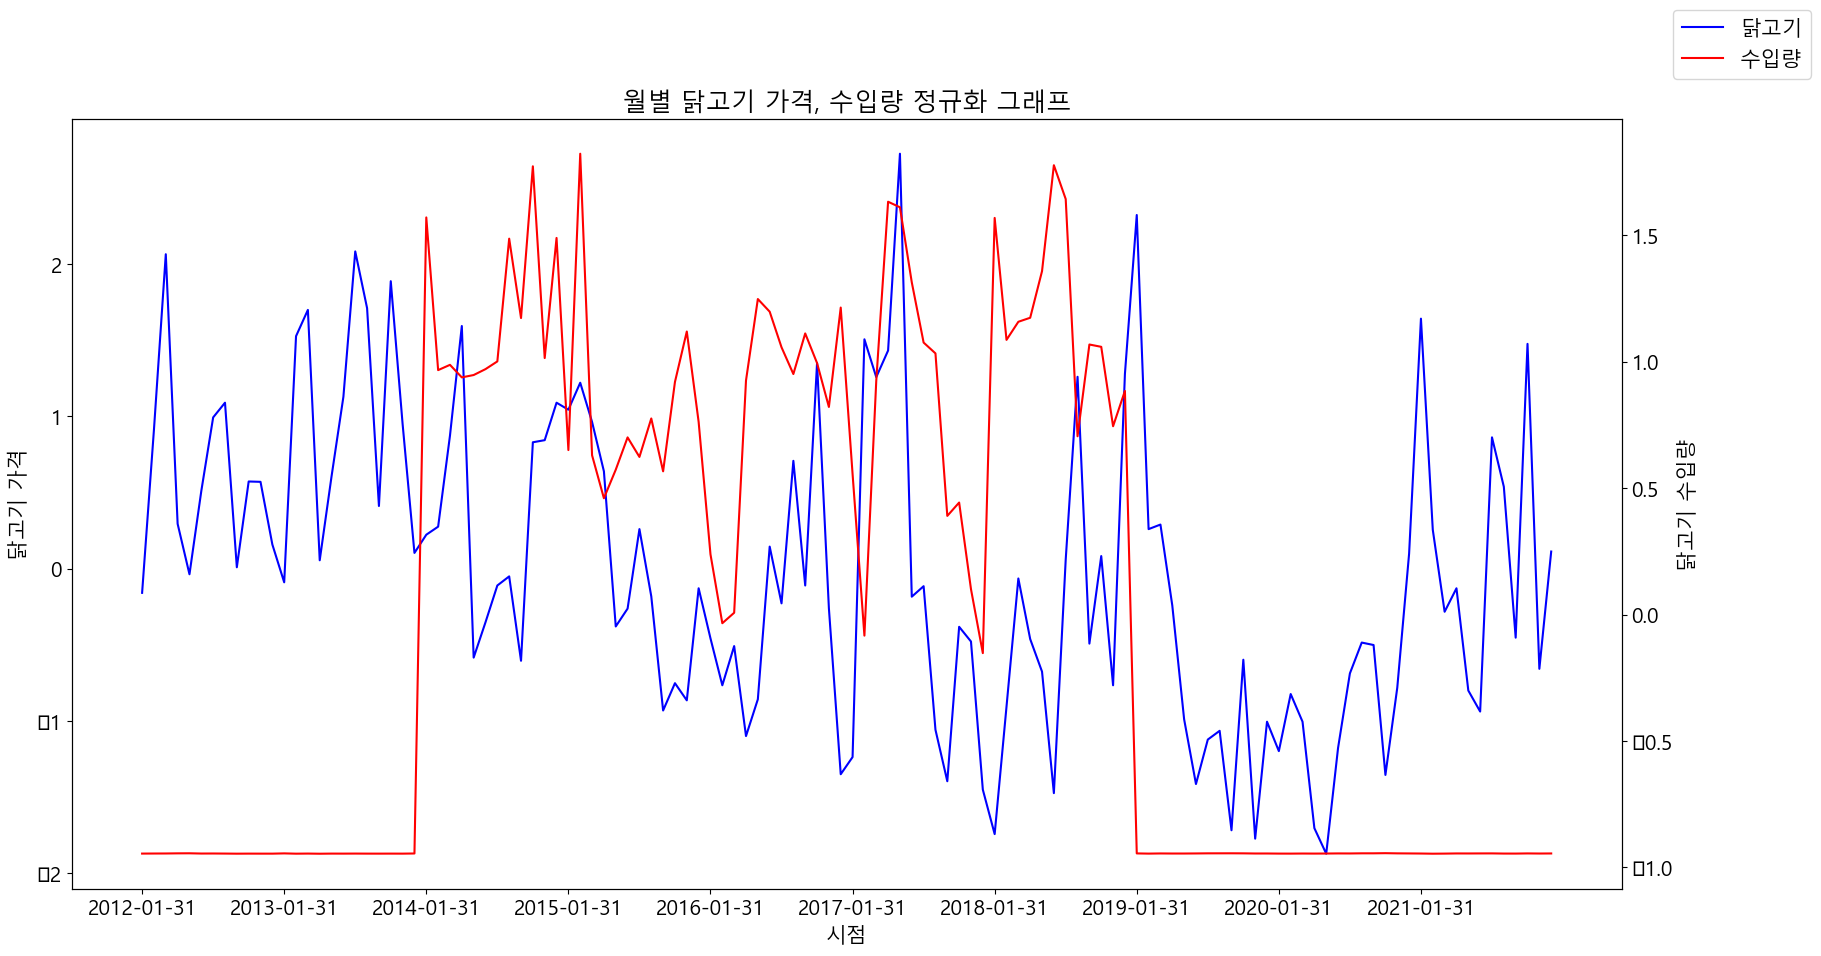

In [144]:
# 월별 닭고기, 수입량 정규화 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price_df['date']
y1 = price_df['price_ss']
y2 = income_df['income_ss']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기 가격, 수입량 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='blue',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('닭고기 수입량')
ax2.plot(x, y2, color='red',label='수입량')

plt.xticks(['2012-01-31', '2013-01-31', '2014-01-31','2015-01-31','2016-01-31','2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31', '2021-01-31'])
fig.legend()
plt.show()

### 그룹별 정규화 그래프

##### 그래프를 설명할 기준, 지수화 시키기 위한 기준
- 정규화 된 [ 닭고기 평균 값 / 수입량 평균 값 ] 구하기
- 각 값들이 평균으로부터 떨어진 거리 (분산 or 표준편차) 구하기
- 평균 - 평균 후 값들이 떨어진 거리들도 같이 계산하기 

-생각해볼 부분
- 평균대비 해석해도 가능 꼭지점 기준으로 해도되고 그래프도 가능...
- 파란거 평균 선 으로 해석 가능
- 평균 대비 폭 >> 평균끼리 차이점 구가늬 플마값을 거리 절대값

In [201]:
# 그래프 편차에 맞춰 닭고기 가격, 수입량 기간 분리
price_group1 = price_df.iloc[:23,:]
price_group2 = price_df.iloc[24:83,:]
price_group3 = price_df.iloc[84:,:]


income_group1 = income_df.iloc[:23,:]
income_group2 = income_df.iloc[24:83,:]
income_group3 = income_df.iloc[84:,:]

##### 정규화 그래프 시각화

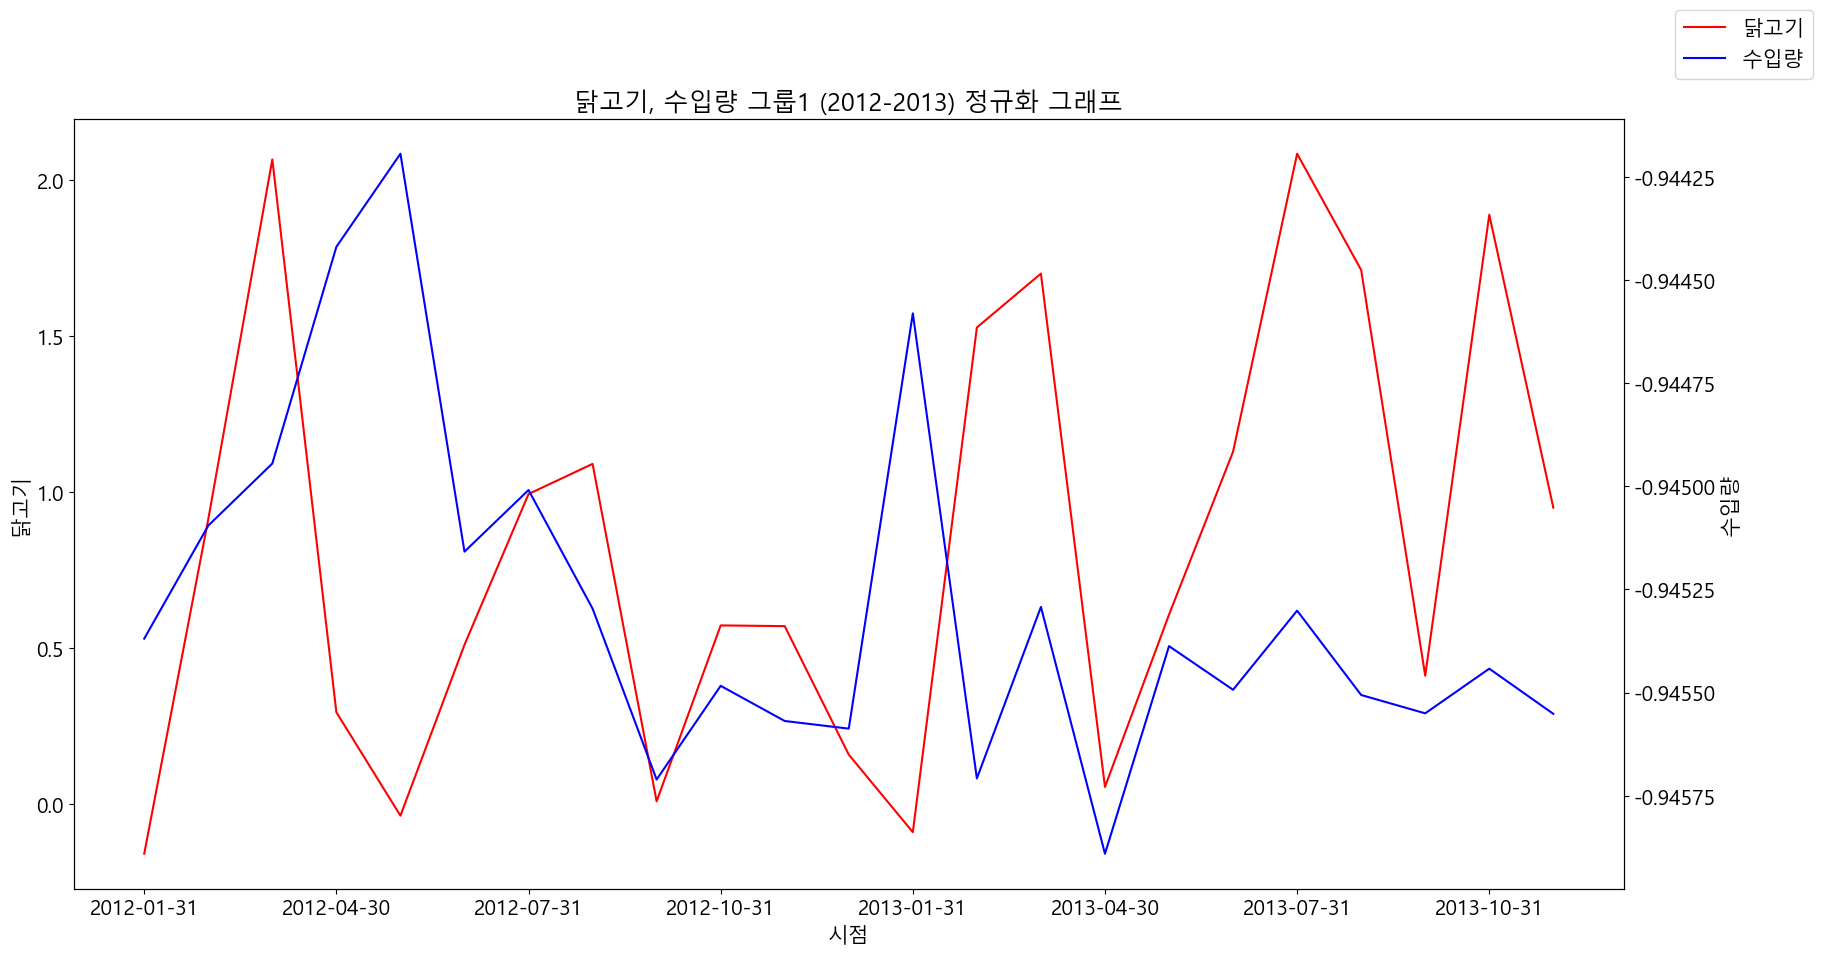

In [202]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name
matplotlib.rcParams['axes.unicode_minus'] = False 

x = price_group1['date']
y1 = price_group1['price_ss']
y2 = income_group1['income_ss']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹1 (2012-2013) 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2012-01-31', '2012-04-30', '2012-07-31', '2012-10-31', '2013-01-31', '2013-04-30', '2013-07-31', '2013-10-31'])
fig.legend()
plt.show()

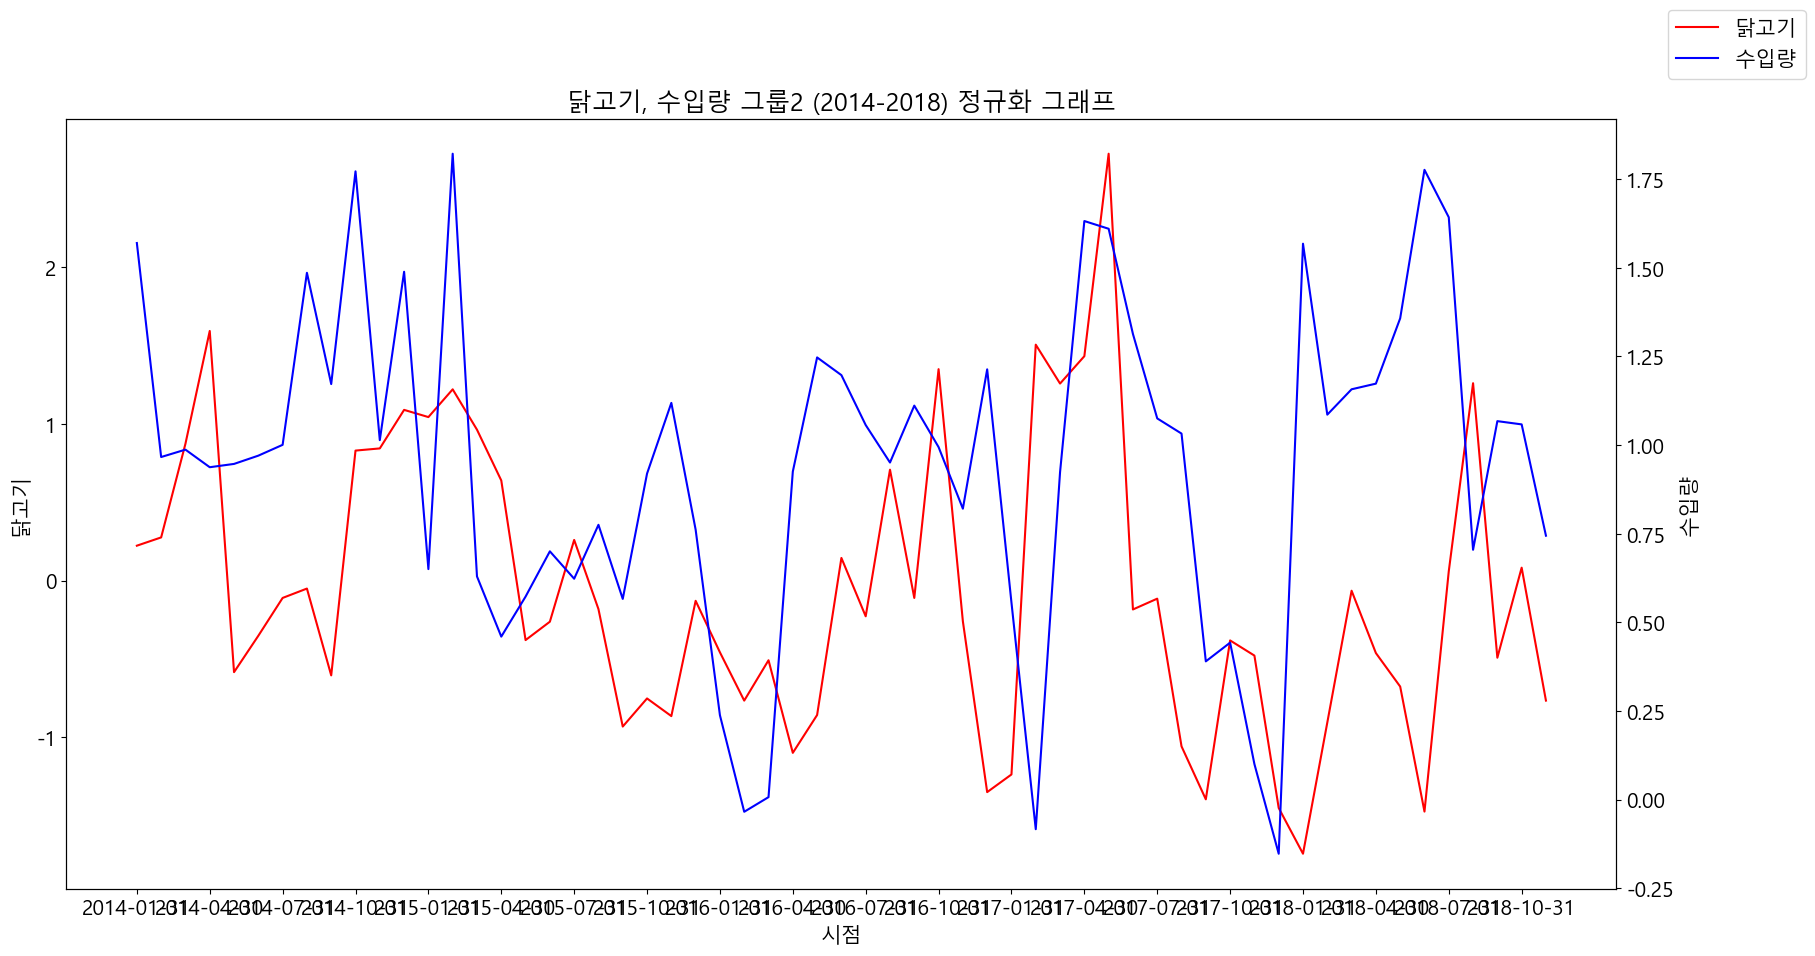

In [203]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name
matplotlib.rcParams['axes.unicode_minus'] = False 

x = price_group2['date']
y1 = price_group2['price_ss']
y2 = income_group2['income_ss']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹2 (2014-2018) 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2014-01-31', '2014-04-30', '2014-07-31', '2014-10-31', '2015-01-31', '2015-04-30', '2015-07-31', '2015-10-31', '2016-01-31', '2016-04-30', '2016-07-31', '2016-10-31',
             '2017-01-31', '2017-04-30', '2017-07-31', '2017-10-31', '2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31'])
fig.legend()
plt.show()

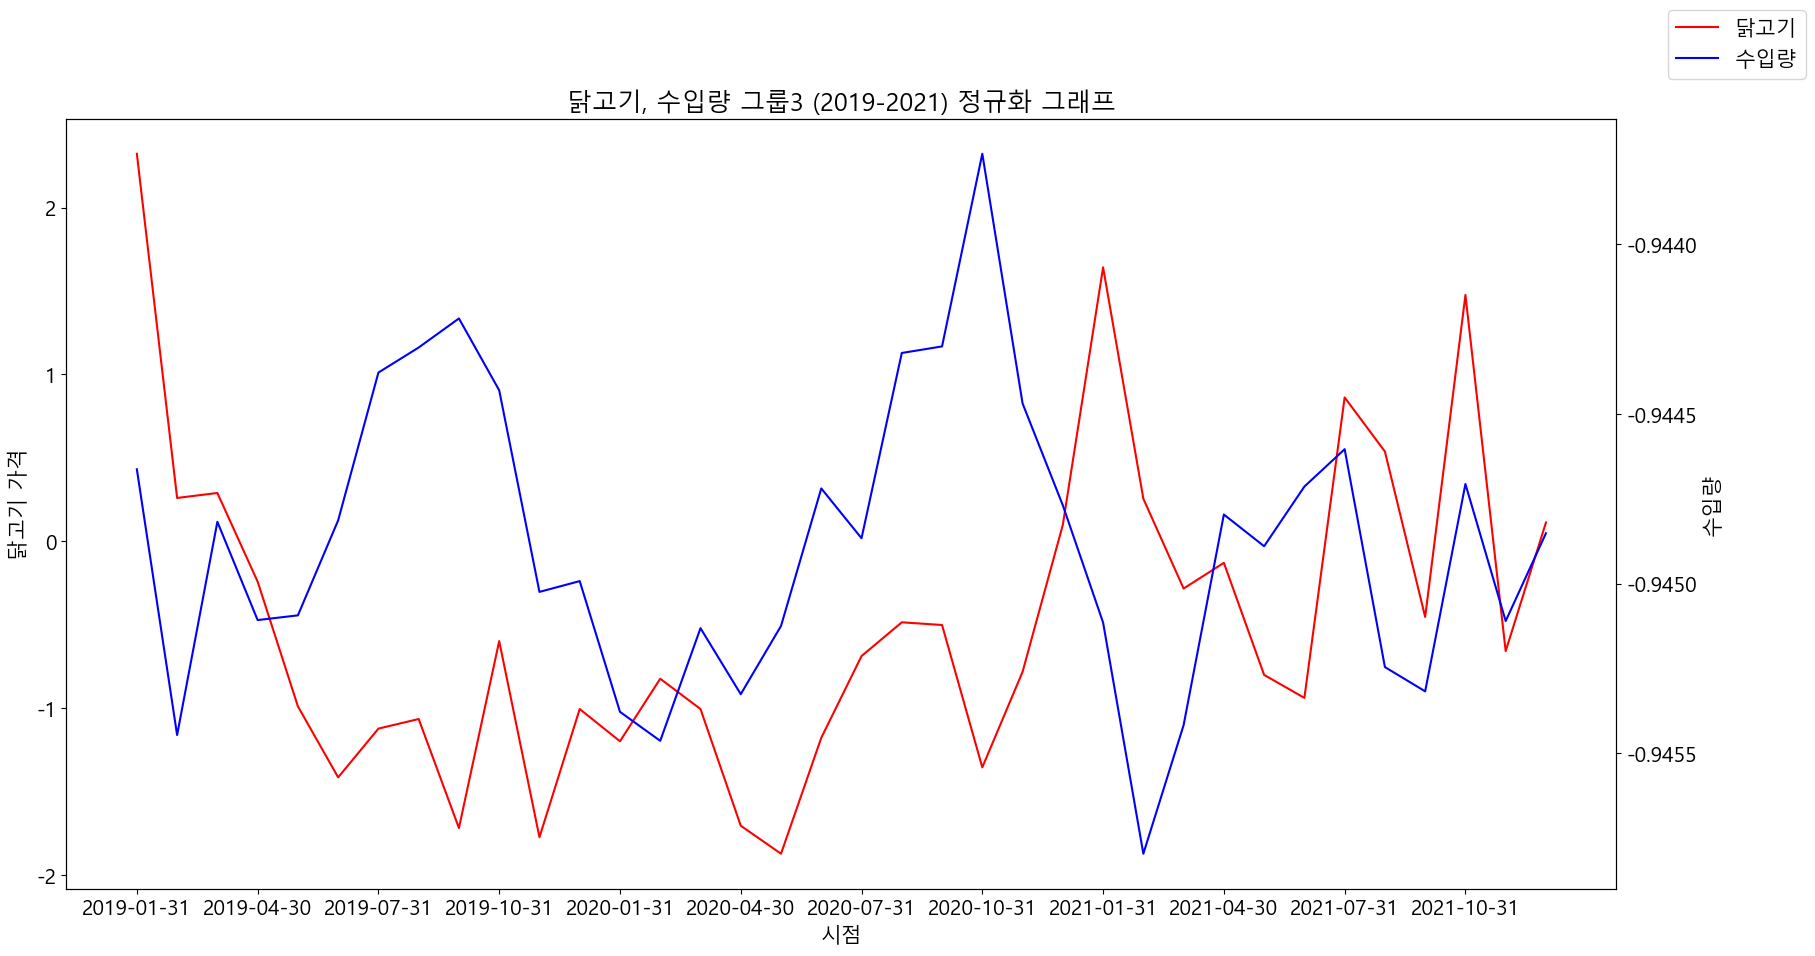

In [159]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name
matplotlib.rcParams['axes.unicode_minus'] = False 

x = price_group3['date']
y1 = price_group3['price_ss']
y2 = income_group3['income_ss']

fig, ax1 = plt.subplots()
ax1.set_title('닭고기, 수입량 그룹3 (2019-2021) 정규화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기')
ax1.plot(x, y1, color='red',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.plot(x, y2, color='blue',label='수입량')

plt.xticks(['2019-01-31', '2019-04-30', '2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31'])
fig.legend()
plt.show()

- 수입량이 떨어질수록 닭고기 올라가고, 수입량이 늘어날수록 닭고기 가격 떨어지는게 보인다
- 파란색(수입량)의 평균을 구해서 수입량이 평균으로 부터 떨어진 거리 구해두기

##### 그룹별 정규화된 수입량, 닭고기 가격 값 평균 구하기

In [204]:
price_ss_mean1 = price_group1['price_ss'].mean()
income_ss_mean1 = income_group1['income_ss'].mean()

print(price_ss_mean1, income_ss_mean1)

0.8236048204131915 -0.9452845006675542


In [205]:
price_ss_mean2 = price_group2['price_ss'].mean()
income_ss_mean2 = income_group2['income_ss'].mean()

print(price_ss_mean2, income_ss_mean2)

-0.05724049804498116 0.9460646532862984


In [206]:
price_ss_mean3 = price_group3['price_ss'].mean()
income_ss_mean3 = income_group3['income_ss'].mean()

print(price_ss_mean3, income_ss_mean3)

-0.47074463000894234 -0.9448737885751728


##### 그룹별 정규화된 수입량, 닭고기 가격 값 평균으로부터 떨어진 거리 구하기

In [208]:
price_group1['ss_mean_dist'] = (price_group1['price_ss'] - price_ss_mean1).abs()
price_group1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\2276674066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_group1['ss_mean_dist'] = (price_group1['price_ss'] - price_ss_mean1).abs()


,Unnamed: 0,date,price,price_ss,ss_mean_dist
0,0,2012-01-31,3202,-0.159385,0.982990
1,1,2012-02-29,3668,0.912513,0.088908
2,2,2012-03-31,4169,2.064919,1.241314
3,3,2012-04-30,3399,0.293756,0.529849
4,4,2012-05-31,3255,-0.037474,0.861079


In [209]:
income_group1['ss_mean_dist'] = (income_group1['income_ss'] - income_ss_mean1).abs()
income_group1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\2159608077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_group1['ss_mean_dist'] = (income_group1['income_ss'] - income_ss_mean1).abs()


,Unnamed: 0,date,import amount,income_ss,ss_mean_dist
0,0,2012-01-31,8754,-0.945369,0.000085
1,1,2012-02-29,10098,-0.945095,0.000189
2,2,2012-03-31,10836,-0.944945,0.000340
3,3,2012-04-30,13412,-0.944420,0.000865
4,4,2012-05-31,14519,-0.944194,0.001091


In [210]:
price_group2['ss_mean_dist'] = (price_group2['price_ss'] - price_ss_mean2).abs()
price_group2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\2930111275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_group2['ss_mean_dist'] = (price_group2['price_ss'] - price_ss_mean2).abs()


,Unnamed: 0,date,price,price_ss,ss_mean_dist
24,24,2014-01-31,3368,0.222450,0.279690
25,25,2014-02-28,3391,0.275354,0.332595
26,26,2014-03-31,3651,0.873409,0.930650
27,27,2014-04-30,3964,1.593376,1.650616
28,28,2014-05-31,3017,-0.584925,0.527684


In [211]:
income_group2['ss_mean_dist'] = (income_group2['income_ss'] - income_ss_mean2).abs()
income_group2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\1534804925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_group2['ss_mean_dist'] = (income_group2['income_ss'] - income_ss_mean2).abs()


,Unnamed: 0,date,import amount,income_ss,ss_mean_dist
24,24,2014-01-31,12346594,1.570127,0.624062
25,25,2014-02-28,9385446,0.966394,0.020330
26,26,2014-03-31,9487707,0.987244,0.041179
27,27,2014-04-30,9244386,0.937634,0.008430
28,28,2014-05-31,9290065,0.946948,0.000883


In [212]:
price_group3['ss_mean_dist'] = (price_group3['price_ss'] - price_ss_mean3).abs()
price_group3.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\528248168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_group3['ss_mean_dist'] = (price_group3['price_ss'] - price_ss_mean3).abs()


,Unnamed: 0,date,price,price_ss,ss_mean_dist
84,84,2019-01-31,4281,2.322543,2.793287
85,85,2019-02-28,3384,0.259253,0.729998
86,86,2019-03-31,3397,0.289156,0.759900
87,87,2019-04-30,3166,-0.242193,0.228552
88,88,2019-05-31,2841,-0.989762,0.519017


In [213]:
income_group3['ss_mean_dist'] = (income_group3['income_ss'] - income_ss_mean3).abs()
income_group3.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8856\2746009028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_group3['ss_mean_dist'] = (income_group3['income_ss'] - income_ss_mean3).abs()


,Unnamed: 0,date,import amount,income_ss,ss_mean_dist
84,84,2019-01-31,12218,-0.944663,0.000211
85,85,2019-02-28,8378,-0.945446,0.000572
86,86,2019-03-31,11459,-0.944818,0.000056
87,87,2019-04-30,10039,-0.945107,0.000234
88,88,2019-05-31,10107,-0.945094,0.000220


##### d

In [ ]:
test

## 닭고기 - 수입량 나온 값을 그 값들의 평균을 내서, 평균으로부터의 값들의 거리를 계산
- 거리를 양수값으로 변경해도 될듯 (절댓값 사용)
- 그거에 대한 범주화 하기

### 닭고기 가격에 변동이 되는 이벤트 시점을 찾아보기
- 물가동향, 금리인상, 복날, 전쟁

### 22년도 데이터들로 학습 모델에 테스트 해보기